In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
import numpy as np
%matplotlib inline

In [2]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

# Load model trained with caffe pretrained model

In [3]:
trainer.load('./checkpoints/fasterrcnn_02071907_0.7010876357676961')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model

In [4]:
img = read_image('misc/demo.jpg')
img = t.from_numpy(img)[None]

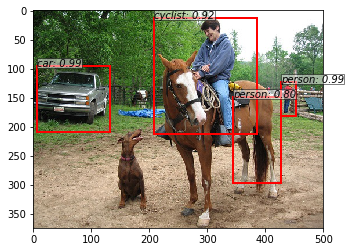

In [5]:
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

# Display a Kitti image

In [6]:
img_paths = [
    '/media/tadenoud/DATADisk/datasets/kitti_2d/training/image_2/005009.png',
    '/media/tadenoud/DATADisk/datasets/kitti_2d/training/image_2/005010.png'
]

imgs = np.array([read_image(p) for p in img_paths])

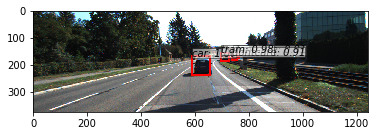

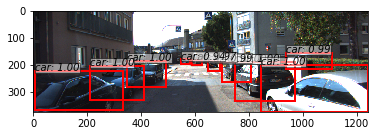

In [7]:
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(imgs,visualize=True)
vis_bbox(at.tonumpy(imgs[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))

vis_bbox(at.tonumpy(imgs[1]),
         at.tonumpy(_bboxes[1]),
         at.tonumpy(_labels[1]).reshape(-1),
         at.tonumpy(_scores[1]).reshape(-1))

In [8]:
# Read a Kitti GT label
from data.util import read_bbox

img_label_paths = [
    '/media/tadenoud/DATADisk/datasets/kitti_2d/training/label_2/005009.txt',
    '/media/tadenoud/DATADisk/datasets/kitti_2d/training/label_2/005010.txt'
]

gt = np.array([read_bbox(p) for p in img_label_paths]) 
gt_bboxes = gt[:,0]
gt_labels = gt[:,1]

In [9]:
# bbx, scs, rois = trainer.faster_rcnn.train_ood(img, gt_bboxes, gt_labels, visualize=True)
# rpn_locs, rpn_scores, rois, roi_indices, anchor = trainer.faster_rcnn.train_ood(img, bboxes, labels, visualize=True)
mahal_means, mahal_sigma = trainer.faster_rcnn.train_ood(imgs, gt_bboxes, gt_labels, visualize=True)

In [11]:
mahal_sigma

array([[ 4.05071548e-02,  3.20164966e-03, -1.50051284e-04, ...,
         0.00000000e+00,  1.04869729e-03, -1.92864771e-03],
       [ 3.20164966e-03,  1.33252612e-02, -1.89962431e-04, ...,
         0.00000000e+00,  3.45453833e-03,  1.21281429e-03],
       [-1.50051284e-04, -1.89962431e-04,  9.12114462e-05, ...,
         0.00000000e+00, -4.92237117e-05, -1.31649140e-04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.04869729e-03,  3.45453833e-03, -4.92237117e-05, ...,
         0.00000000e+00,  1.42144917e-03,  1.57417480e-04],
       [-1.92864771e-03,  1.21281429e-03, -1.31649140e-04, ...,
         0.00000000e+00,  1.57417480e-04,  5.46619136e-03]])